In [58]:
install.packages("forecast")
install.packages("TTR")
install.packages("lmtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [59]:
library(forecast)
library(TTR)
library(lmtest)

### 4. "export.txt" 자료에 대해 각각 다음 물음에 답하여라

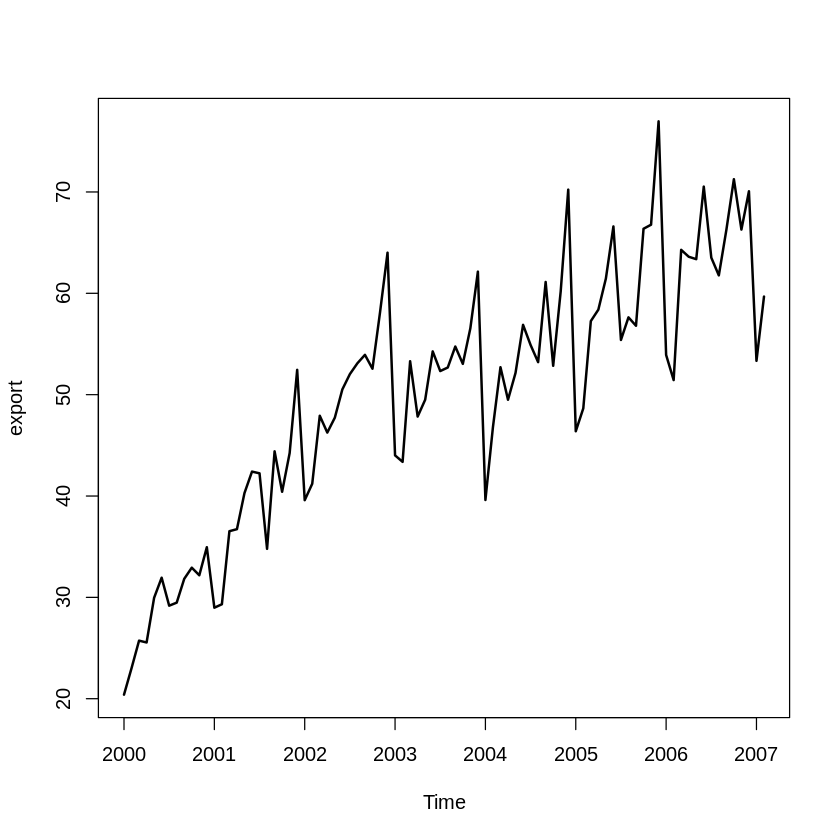

In [60]:
e=scan("export.txt")
t=1:length(e)
export=ts(e,start=c(2000,1),frequency=12)
plot.ts(export,lwd=2)

### - (1) 추세분석을 이용한 분해법에 의한 각 성분의 시계열 그림을 그려라

- 추세성분 추정 ~ 가법모형이용

In [61]:
fit_e=lm(export~t)
summary(fit_e)


Call:
lm(formula = export ~ t)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1230  -4.0245  -0.6699   4.1819  17.3619 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.62075    1.37454   22.28   <2e-16 ***
t            0.44520    0.02744   16.22   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.318 on 84 degrees of freedom
Multiple R-squared:  0.758,	Adjusted R-squared:  0.7552 
F-statistic: 263.2 on 1 and 84 DF,  p-value: < 2.2e-16


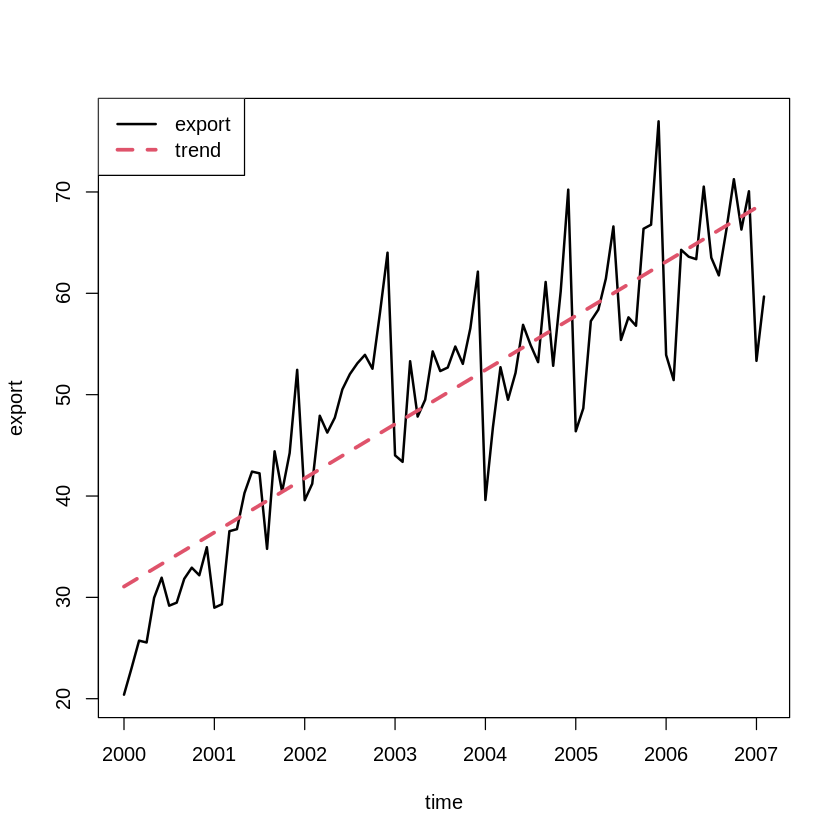

In [62]:
hat_Tte=fitted(fit_e)
ts.plot(export,hat_Tte,col=1:2,lty=1:2,lwd=2:3,xlab="time",ylab="export")
legend("topleft",lty=1:2,col=1:2,lwd=2:3,c("export","trend"))

- 추세성분 추정 ~ 승법모형 이용

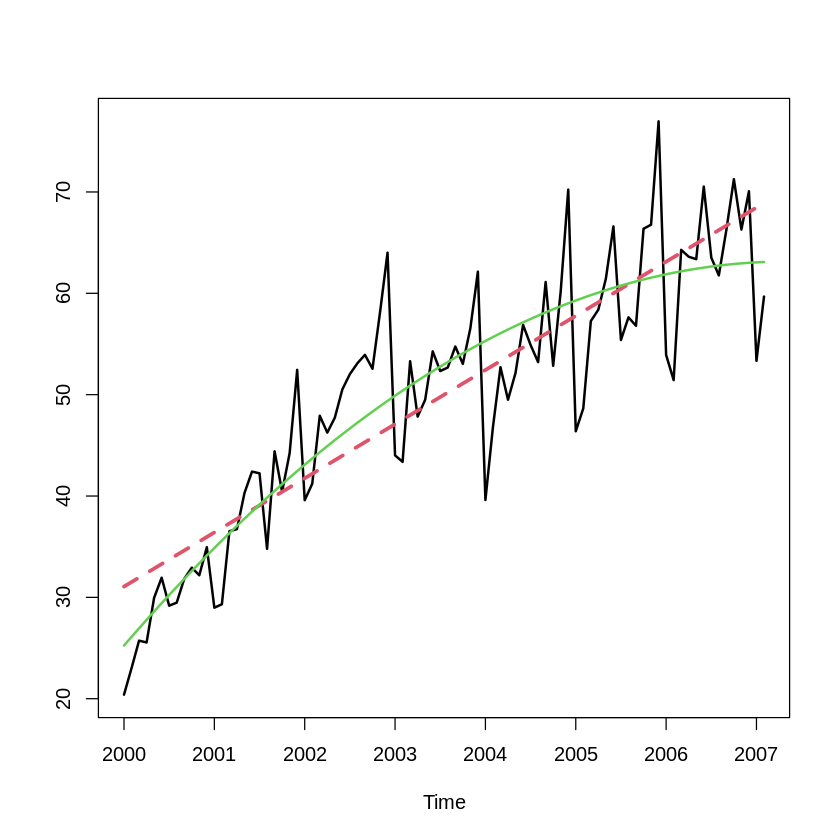

In [63]:
fit_e1=lm(export~t)
fit_e2=lm(export~t+I(t^2))

ts.plot(export,fitted(fit_e1),fitted(fit_e2),col=1:3,lty=1:2,lwd=2:3)

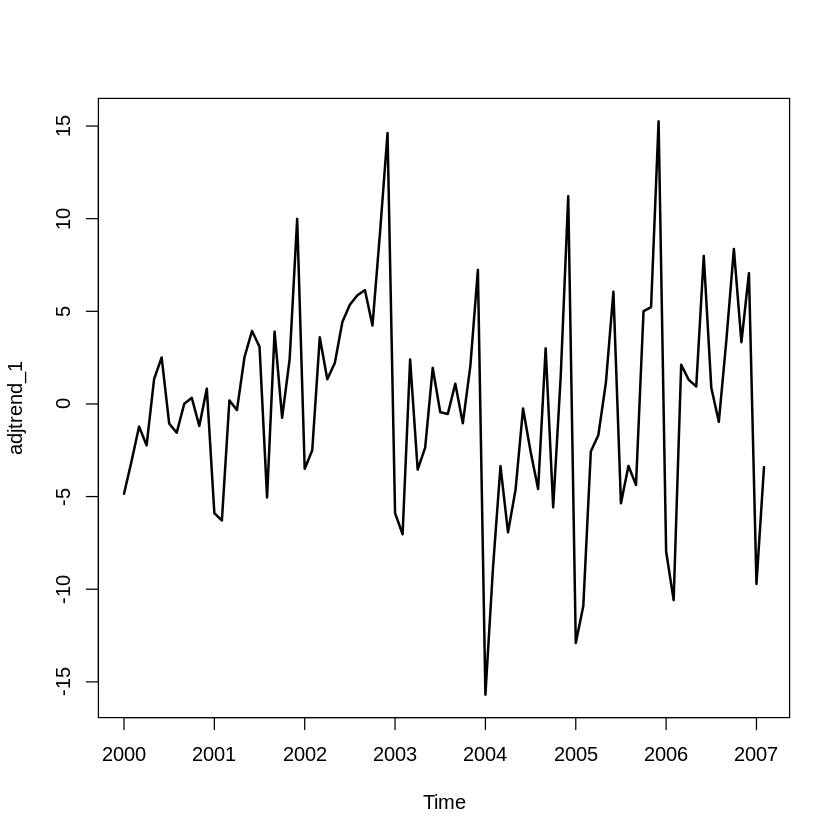

In [66]:


hat_Tte2=fitted(fit_e2)
adjtrend_1=export-hat_Tte2
plot.ts(adjtrend_1,lwd=2)

- 계절성분 추정

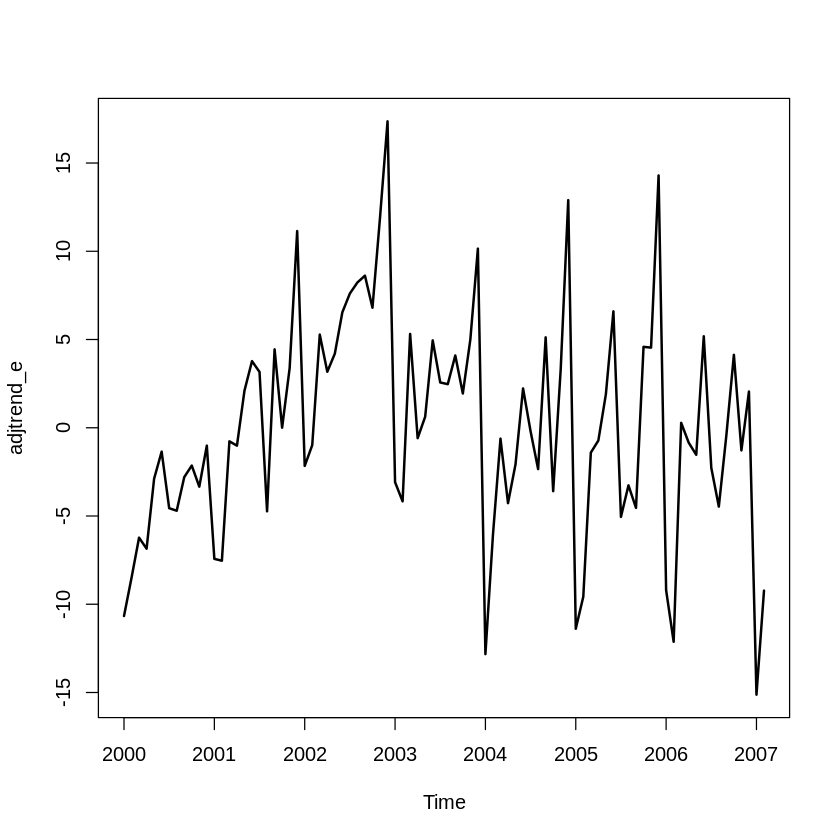

In [64]:
adjtrend_e=export-hat_Tte
plot.ts(adjtrend_e,lwd=2)


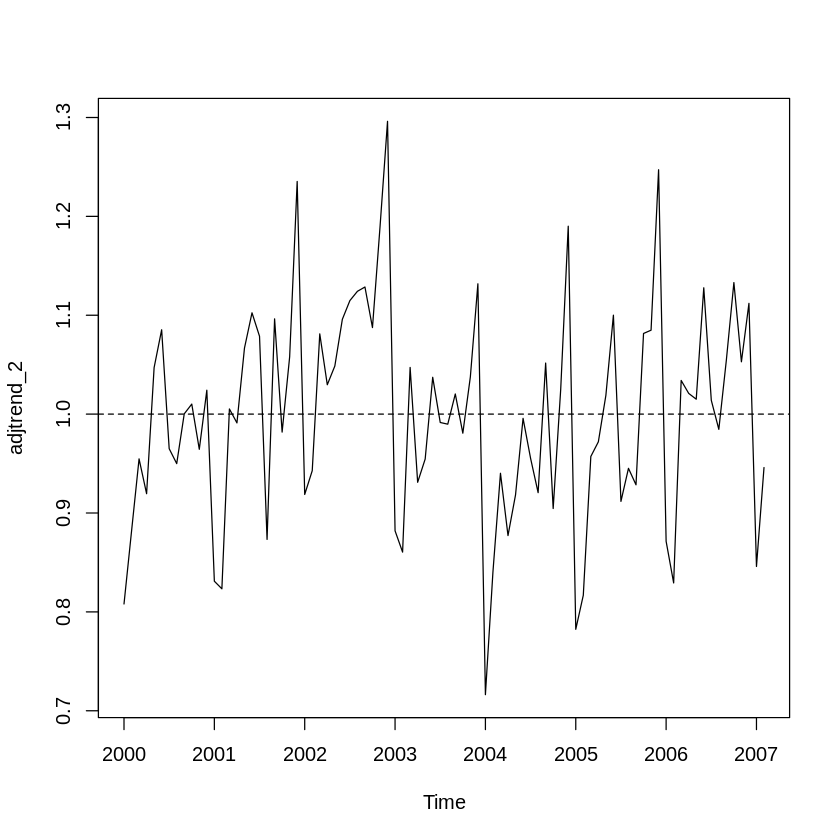

In [ ]:
trend_2=fitted(fit_e2)
adjtrend_2=export/trend_2
plot.ts(adjtrend_2)
abline(h=1,lty=2)

In [ ]:
y=factor(cycle(adjtrend_2))

fit1=lm(adjtrend_2~0+y)
summary(fit1)


Call:
lm(formula = adjtrend_2 ~ 0 + y)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.152476 -0.044123  0.003785  0.043146  0.154544 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
y1   0.83196    0.02342   35.52   <2e-16 ***
y2   0.86755    0.02342   37.05   <2e-16 ***
y3   1.00281    0.02504   40.05   <2e-16 ***
y4   0.96308    0.02504   38.47   <2e-16 ***
y5   1.00993    0.02504   40.34   <2e-16 ***
y6   1.07778    0.02504   43.05   <2e-16 ***
y7   1.00444    0.02504   40.12   <2e-16 ***
y8   0.96966    0.02504   38.73   <2e-16 ***
y9   1.04004    0.02504   41.54   <2e-16 ***
y10  1.02563    0.02504   40.97   <2e-16 ***
y11  1.05885    0.02504   42.29   <2e-16 ***
y12  1.17665    0.02504   47.00   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06624 on 74 degrees of freedom
Multiple R-squared:  0.9963,	Adjusted R-squared:  0.9957 
F-statistic:  1643 on 12 and 74 DF,  p-value: < 2.2e-16


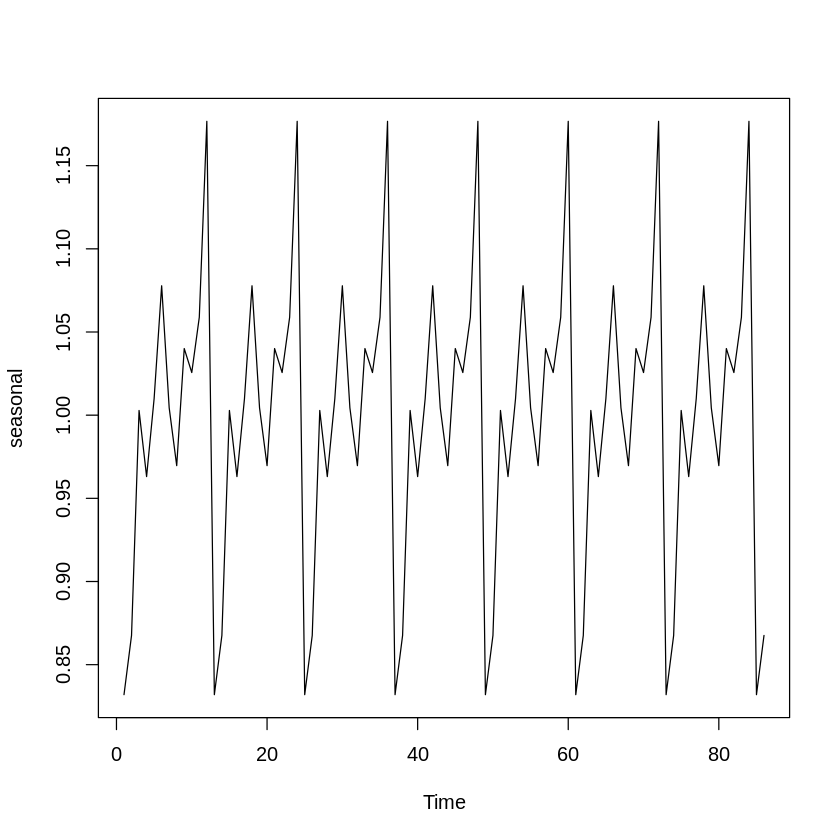

In [ ]:
seasonal=fitted(fit1)
ts.plot(seasonal)

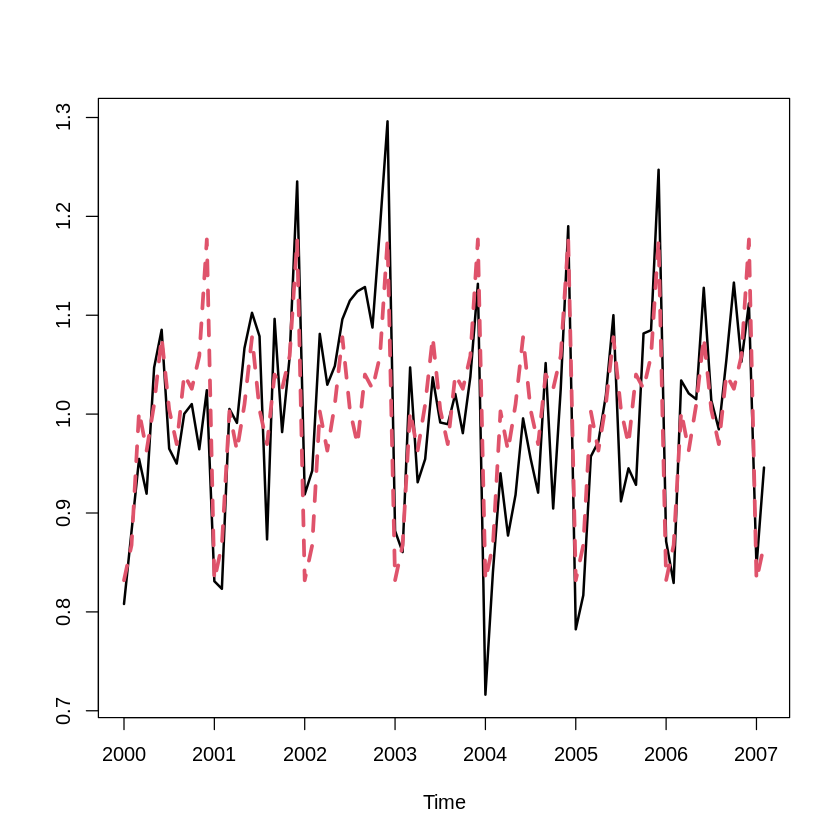

In [ ]:
ts.plot(adjtrend_2,seasonal,col=1:2,lty=1:2,lwd=2:3)

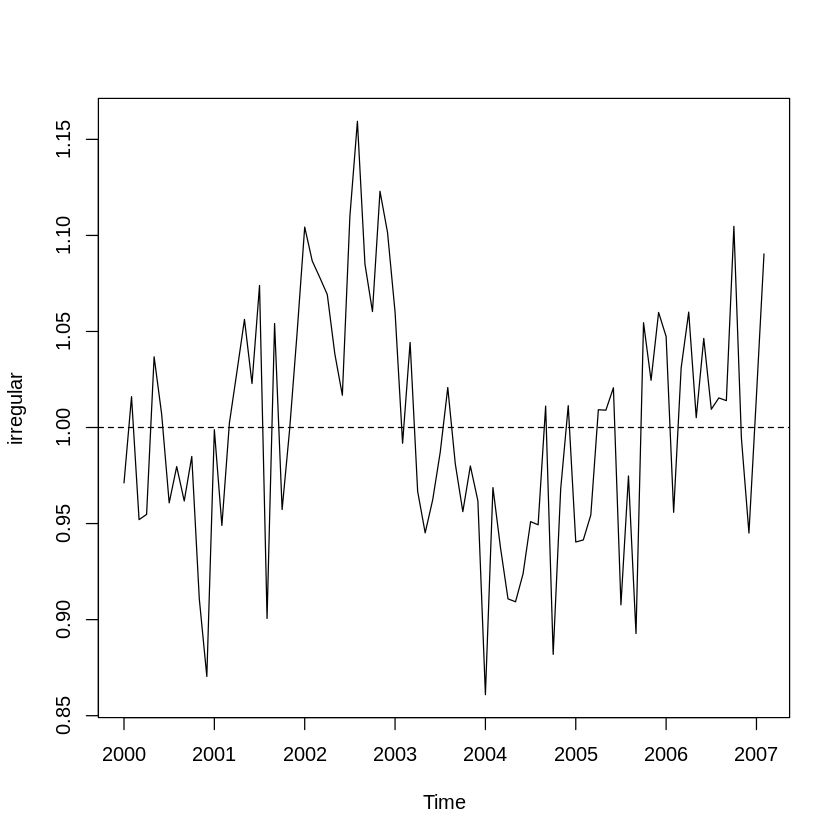

In [71]:
irregular=export/(trend_2*seasonal)
ts.plot(irregular)
abline(h=1,lty=2)

In [ ]:
t.test(irregular,mu=1)


	One Sample t-test

data:  irregular
t = 0, df = 85, p-value = 1
alternative hypothesis: true mean is not equal to 1
95 percent confidence interval:
 0.9867743 1.0132257
sample estimates:
mean of x 
        1 


In [ ]:
dwtest(lm(irregular~1),alternative="two.sided")


	Durbin-Watson test

data:  lm(irregular ~ 1)
DW = 1.0361, p-value = 1.727e-06
alternative hypothesis: true autocorrelation is not 0


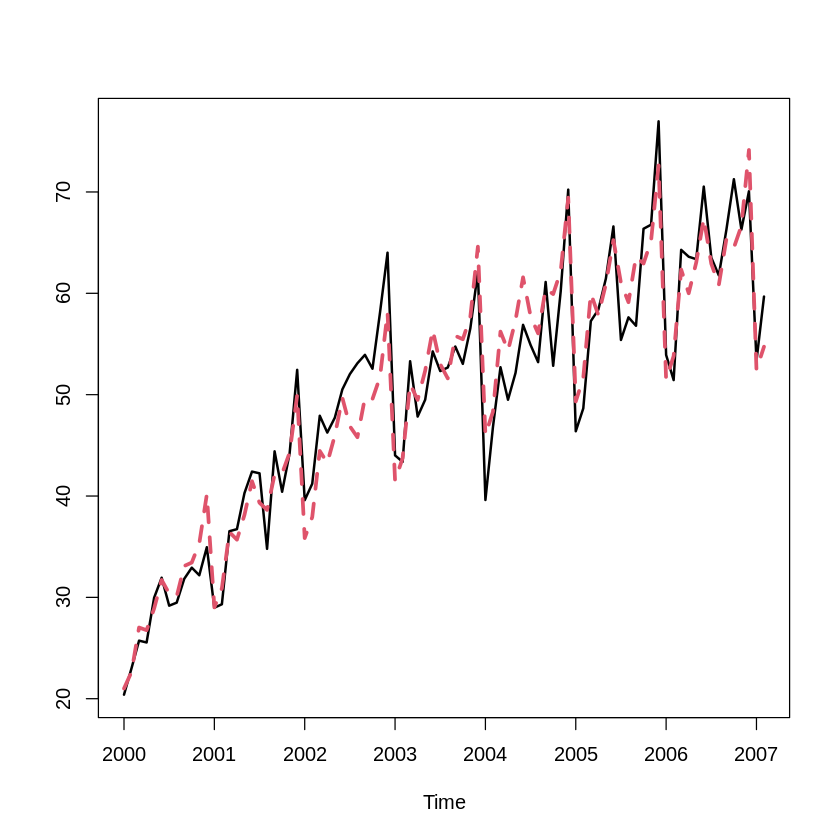

In [ ]:
pred_m=trend_2*seasonal
ts.plot(export,pred_m,col=1:2,lty=1:2,lwd=2:3)

In [101]:
sum((export-pred_m)^2)
mean((export-pred_m)^2)

[1] 835.4487

[1] 9.71452

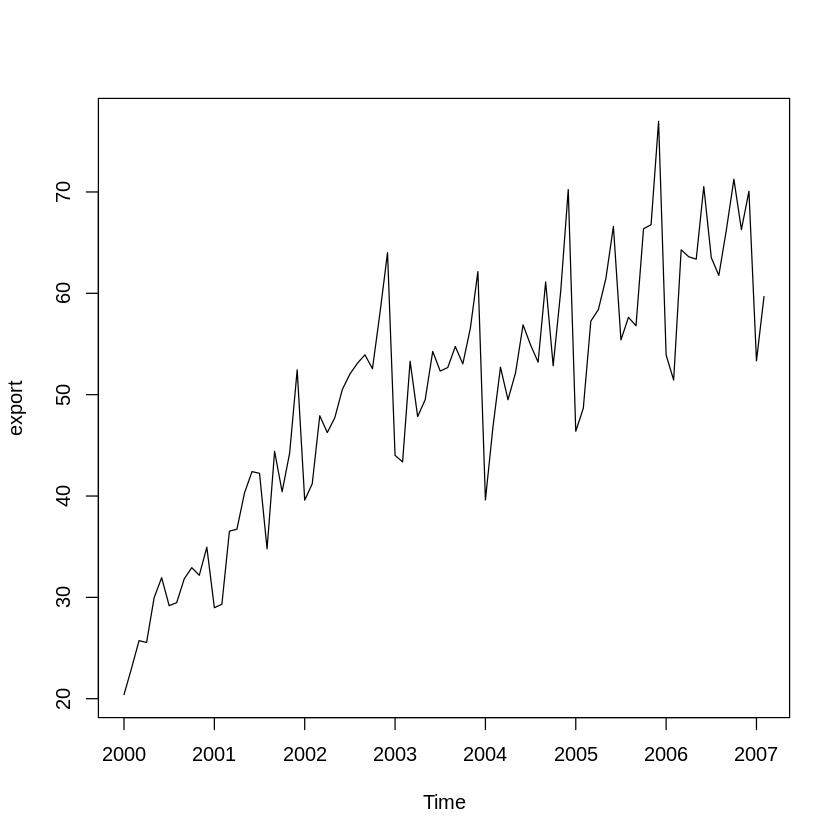

In [67]:
plot.ts(export)

###이동평균을 이용한 분해법

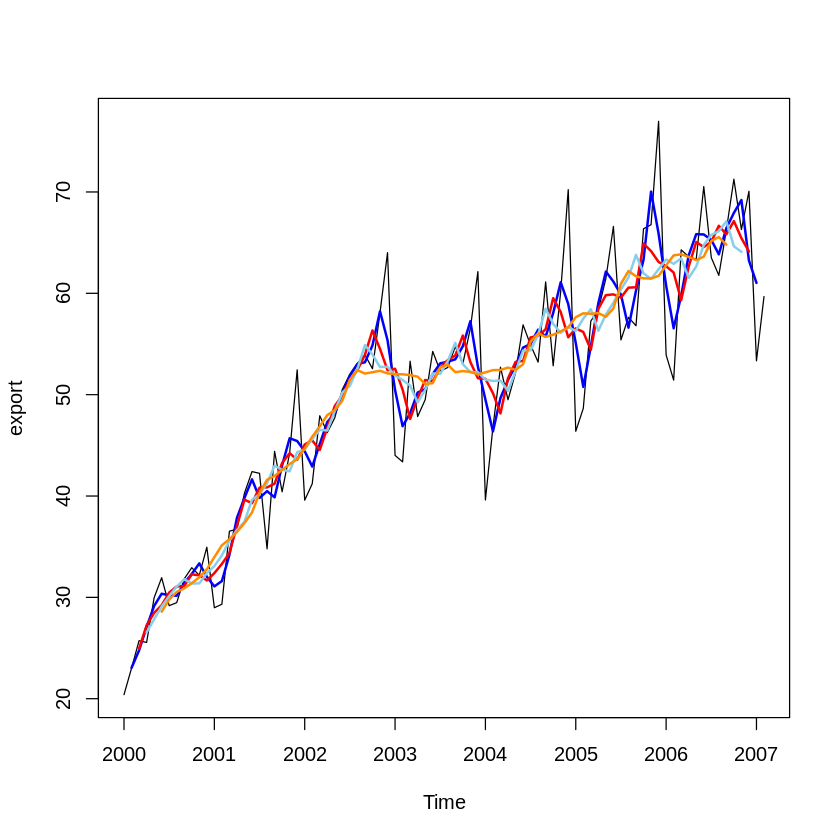

In [68]:
plot.ts(export)
lines(ma(export,3),col="blue",lwd=2)
lines(ma(export,5),col="red",lwd=2)
lines(ma(export,7),col="skyblue",lwd=2)
lines(ma(export,10),col="darkorange",lwd=2)

- 1.추세성분 : 계절주기와 동일한 m을 이용한 중심이동평균

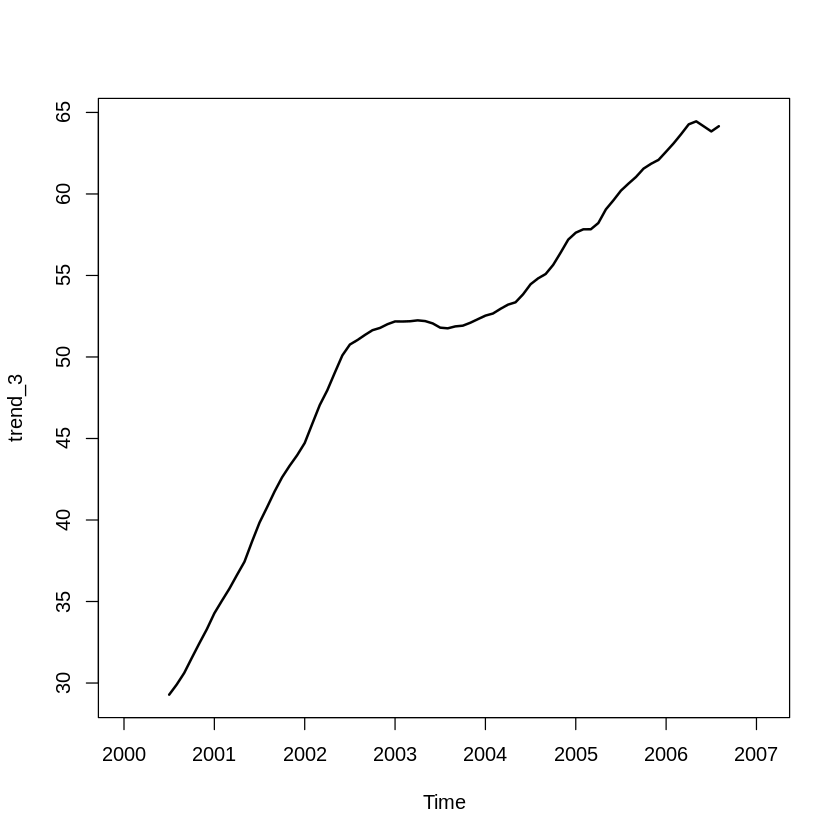

In [72]:
trend_3=ma(export,12)
plot.ts(trend_3,lwd=2)

- 2.계절성분

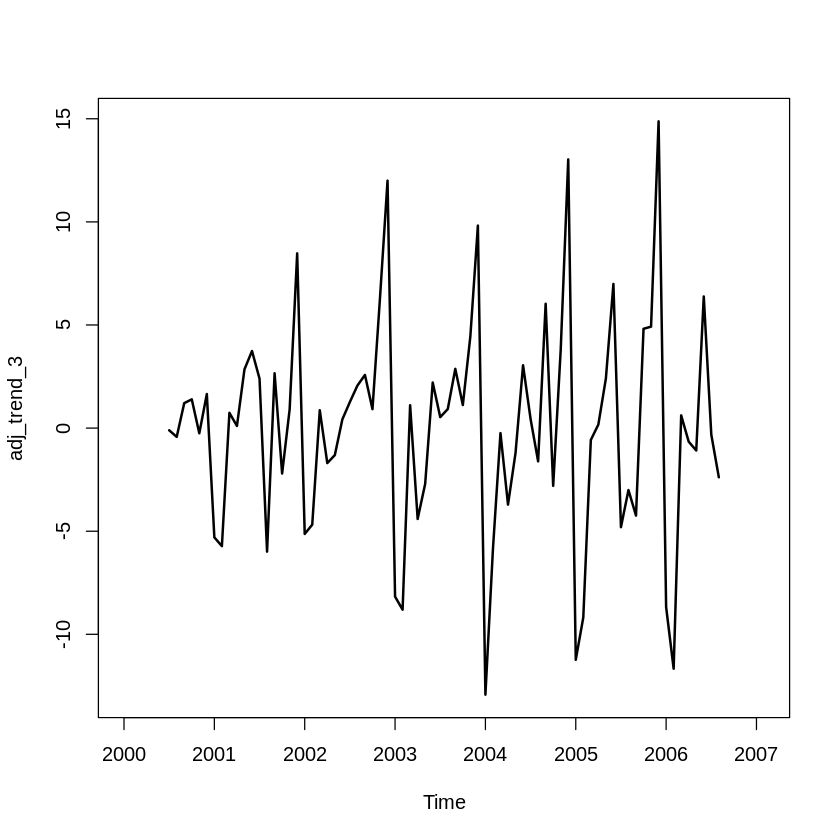

In [73]:
adj_trend_3=export-trend_3
plot.ts(adj_trend_3,lwd=2)

In [74]:
summary(lm(adj_trend_3~0+as.factor(cycle(adj_trend_3))))


Call:
lm(formula = adj_trend_3 ~ 0 + as.factor(cycle(adj_trend_3)))

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3226 -1.4141  0.3492  1.8005  4.9008 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
as.factor(cycle(adj_trend_3))1   -8.5735     1.1268  -7.608 1.89e-10 ***
as.factor(cycle(adj_trend_3))2   -7.6545     1.1268  -6.793 4.90e-09 ***
as.factor(cycle(adj_trend_3))3    0.4189     1.1268   0.372  0.71135    
as.factor(cycle(adj_trend_3))4   -1.6997     1.1268  -1.508  0.13654    
as.factor(cycle(adj_trend_3))5   -0.1744     1.1268  -0.155  0.87752    
as.factor(cycle(adj_trend_3))6    3.7982     1.1268   3.371  0.00129 ** 
as.factor(cycle(adj_trend_3))7   -0.0850     1.0432  -0.081  0.93533    
as.factor(cycle(adj_trend_3))8   -1.4908     1.0432  -1.429  0.15803    
as.factor(cycle(adj_trend_3))9    1.8514     1.1268   1.643  0.10544    
as.factor(cycle(adj_trend_3))10   0.5410     1.1268   0.480  0.63286    
as.factor(cycle(adj

In [75]:
seasonal_3=tapply(adj_trend_3,cycle(adj_trend_3),function(y) mean(y,na.rm=T))
seasonal_3

1          2          3          4          5          6          7 
-8.5734722 -7.6545139  0.4188889 -1.6996528 -0.1743750  3.7981944 -0.0850000 
         8          9         10         11         12 
-1.4907738  1.8513889  0.5409722  3.3563194  9.9746528

In [76]:
mean(seasonal_3)

[1] 0.02188575

In [77]:
seasonal_3=seasonal_3-mean(seasonal_3)
seasonal_3

1          2          3          4          5          6          7 
-8.5953580 -7.6763996  0.3970031 -1.7215385 -0.1962607  3.7763087 -0.1068857 
         8          9         10         11         12 
-1.5126596  1.8295031  0.5190865  3.3344337  9.9527670

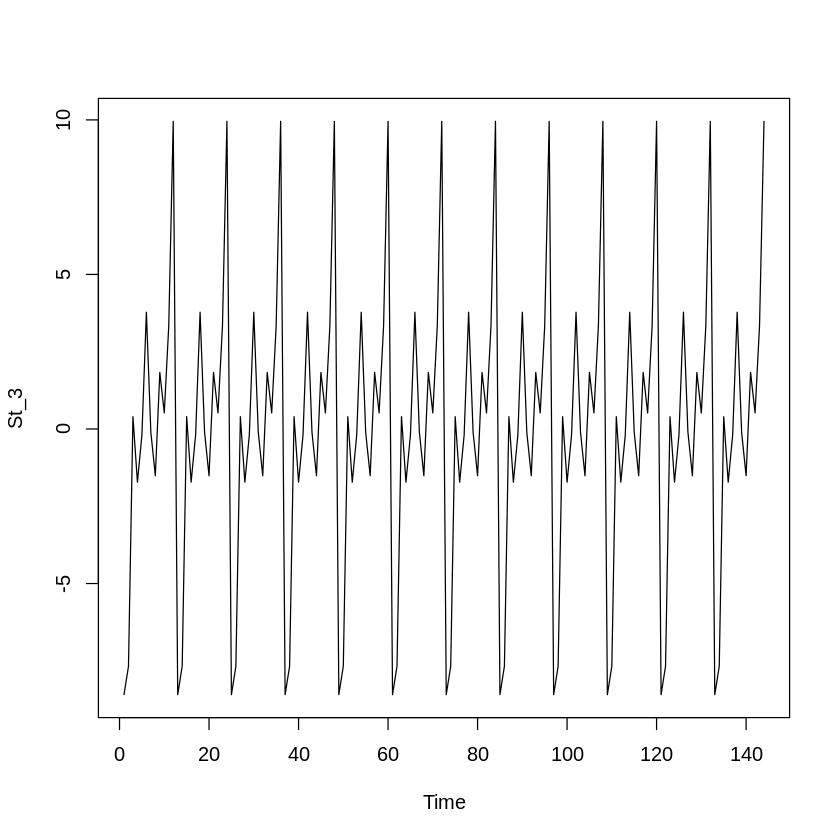

In [78]:
St_3=rep(seasonal_3,12)
plot.ts(St_3)

- 3. 불규칙 성분

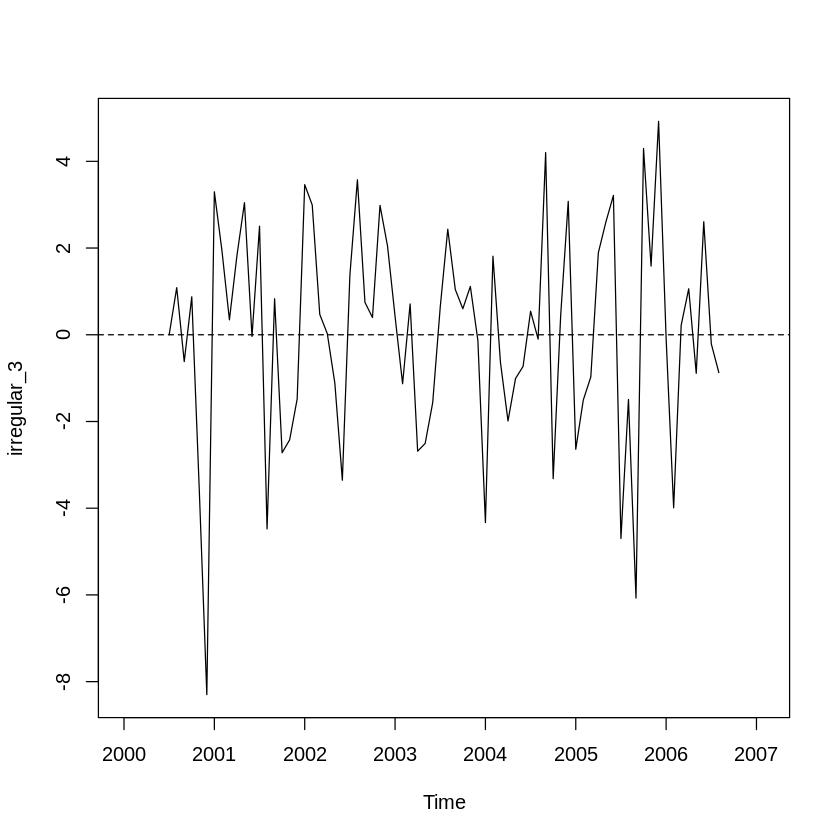

In [94]:
irregular_3=export-(trend_3+St_3[1:86])
plot.ts(irregular_3)
abline(h=0,lty=2)

In [95]:
t.test(irregular_3)


	One Sample t-test

data:  irregular_3
t = 0.074013, df = 73, p-value = 0.9412
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.5674456  0.6112171
sample estimates:
 mean of x 
0.02188575 


In [96]:
dwtest(lm(irregular_3~1))


	Durbin-Watson test

data:  lm(irregular_3 ~ 1)
DW = 1.9469, p-value = 0.4094
alternative hypothesis: true autocorrelation is greater than 0


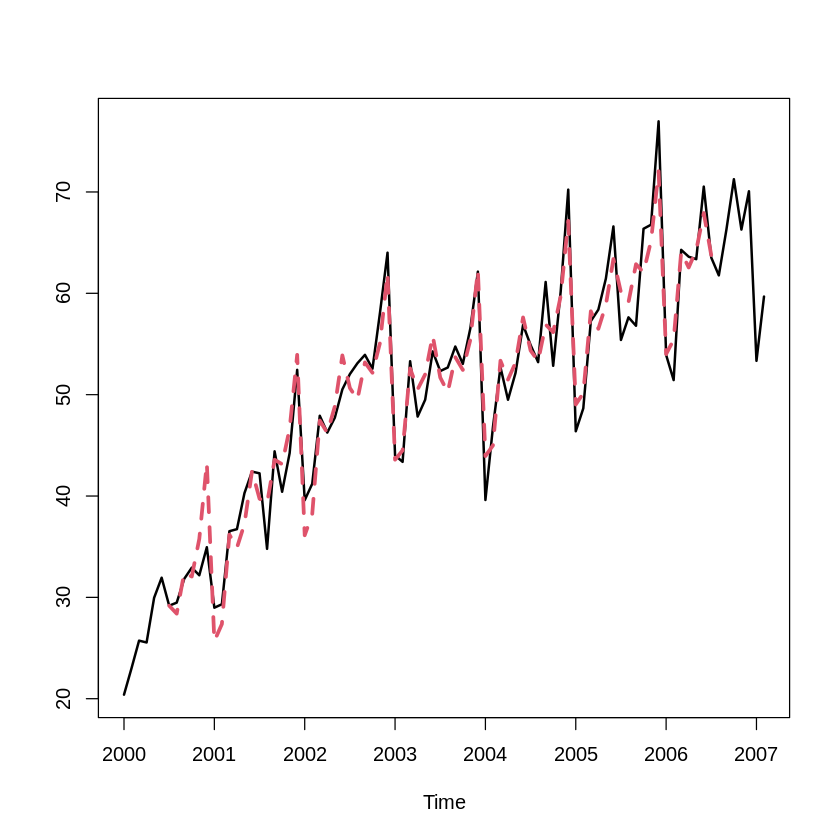

In [98]:
fit_3=trend_3+St_3[1:86]
ts.plot(export,fit_3,lty=1:2,col=1:2,lwd=2:3)

In [100]:
sum((export-fit_3)^2,na.rm=T)
mean((export-fit_3)^2,na.rm=T)

[1] 472.3815

[1] 6.383534

### decompose 함수사용

In [88]:
dec_fit_e1=decompose(export,"additive")

In [81]:
trend[1:15]
dec_fit_e$trend[1:15]

[1]       NA       NA       NA       NA       NA       NA 29.28583 29.90625
 [9] 30.61917 31.53500 32.43125 33.29792 34.27833 35.04375 35.78917

[1]       NA       NA       NA       NA       NA       NA 29.28583 29.90625
 [9] 30.61917 31.53500 32.43125 33.29792 34.27833 35.04375 35.78917

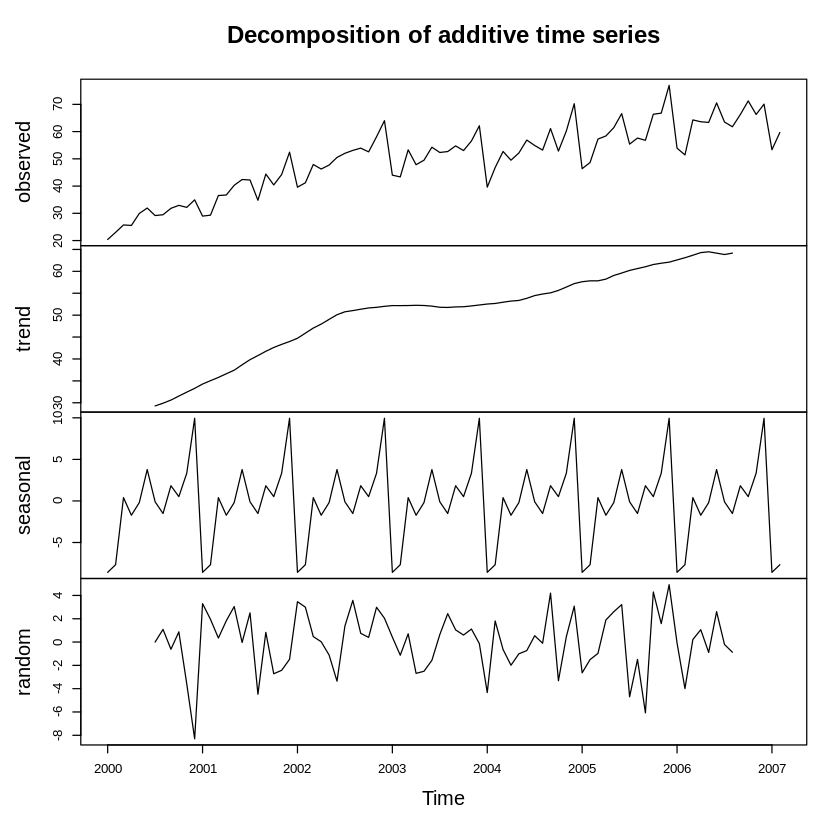

In [89]:
##가법모형 사용
plot(dec_fit_e1)

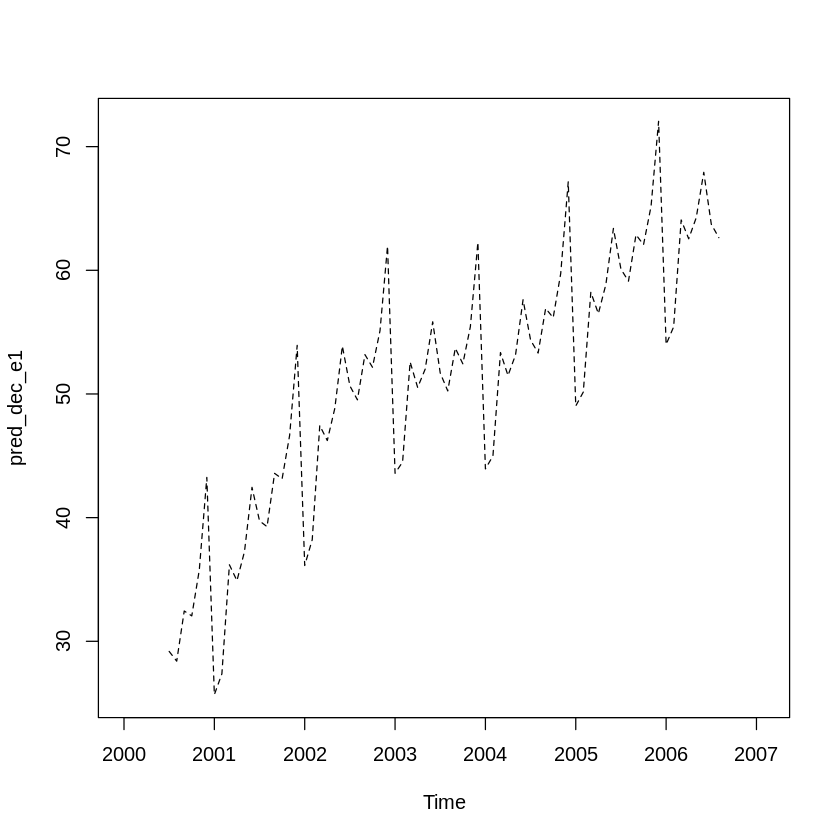

In [90]:
pred_dec_e1=dec_fit_e$trend+dec_fit_e1$seasonal

plot.ts(pred_dec_e1,col=1,lty=2)

In [102]:
sum((export-pred_dec_e1)^2,na.rm=T) ##SSE (이동평균모형이용)가법
mean((export-pred_dec_e1)^2,na.rm=T)  ##MSE (이동평균모형이용)

[1] 472.3815

[1] 6.383534

In [103]:
sum((export-pred_m)^2)  ##SSE 추세분석이용
mean((export-pred_m)^2) ##MSE 추세분석이용

[1] 835.4487

[1] 9.71452

### 5번
- "usapass.txt"는 미국 월별비행기 승객수의 시계열자료.log변환후 분석


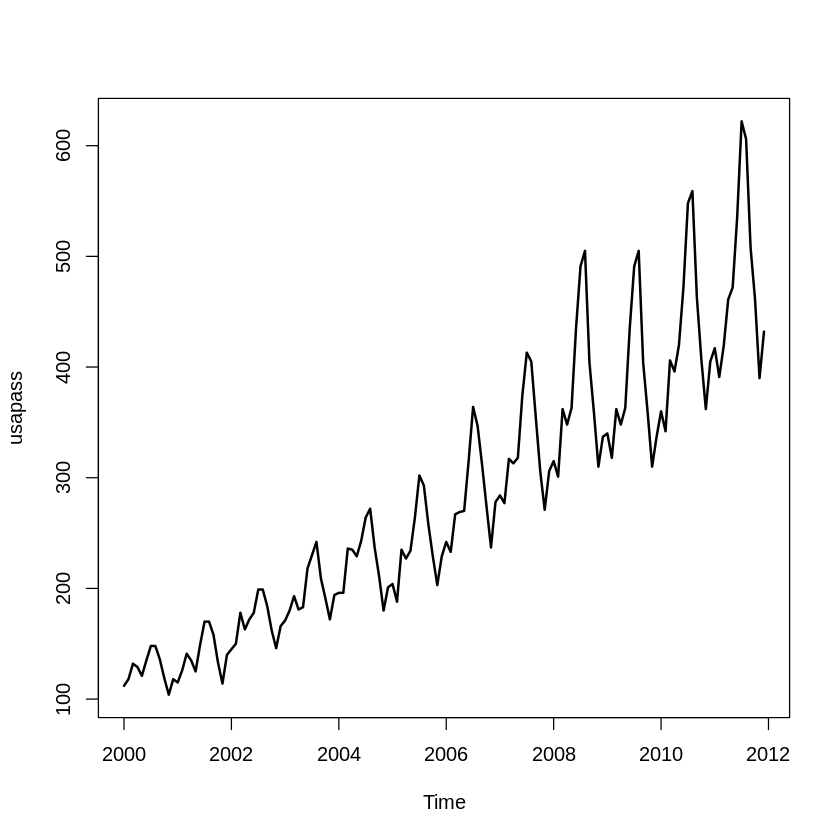

In [104]:
u=scan("usapass.txt")
t=1:length(u)
usapass=ts(u,start=c(2000,1),frequency=12)
plot.ts(usapass,lwd=2)

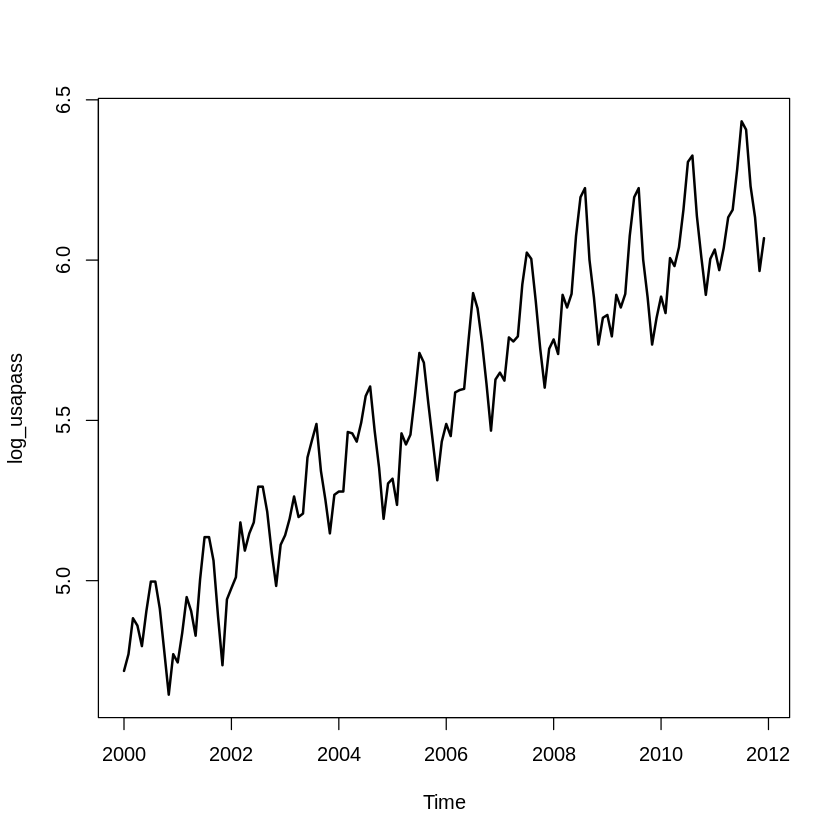

In [105]:
log_usapass=log(usapass)
plot.ts(log_usapass,lwd=2)

- (1) 왜 log 변환이 필요한지에 대해 설명

- 데이터에서 이분산성이 존재하므로
log변환을 하였더니 진폭이 시간의 흐름에따라 거의일정해짐을 알 수 있다

##추세에 의한 분해법

### 추세성분 추정

In [112]:
fit_Tu1=lm(log_usapass~t)
summary(fit_Tu1)


Call:
lm(formula = log_usapass ~ t)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30875 -0.10481 -0.01736  0.09677  0.36311 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.8131072  0.0237011  203.07   <2e-16 ***
t           0.0100802  0.0002836   35.54   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1415 on 142 degrees of freedom
Multiple R-squared:  0.899,	Adjusted R-squared:  0.8982 
F-statistic:  1263 on 1 and 142 DF,  p-value: < 2.2e-16


- $T̂_t=4.81+0.01t$

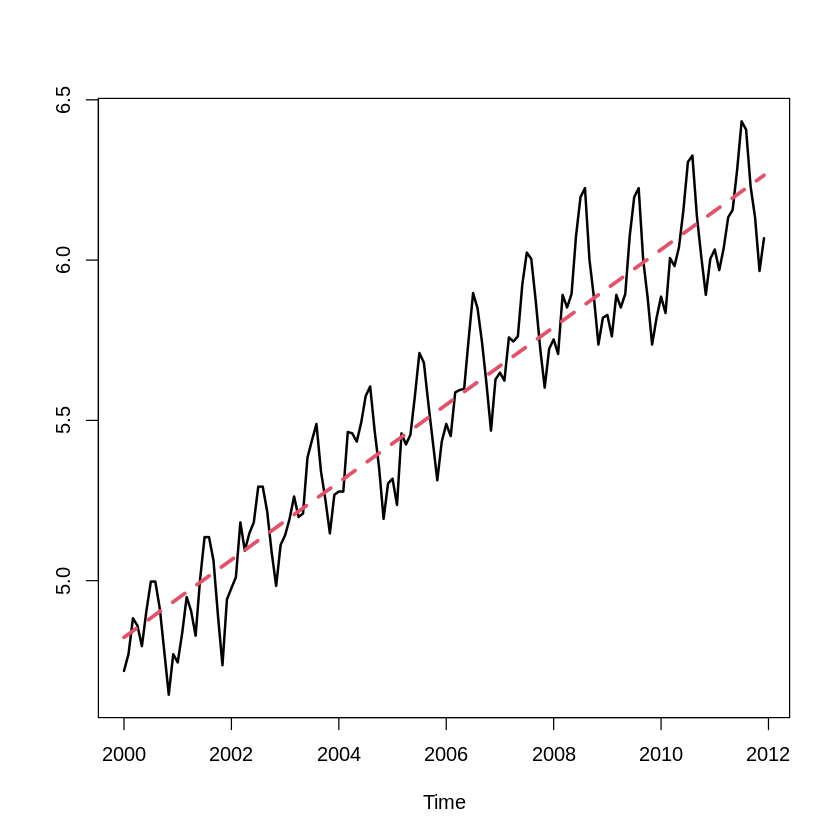

In [113]:
hat_Tu1=fitted(fit_Tu1)
ts.plot(log_usapass,hat_Tu1,col=1:2,lty=1:2,lwd=2:3)

### 계절성분 추정

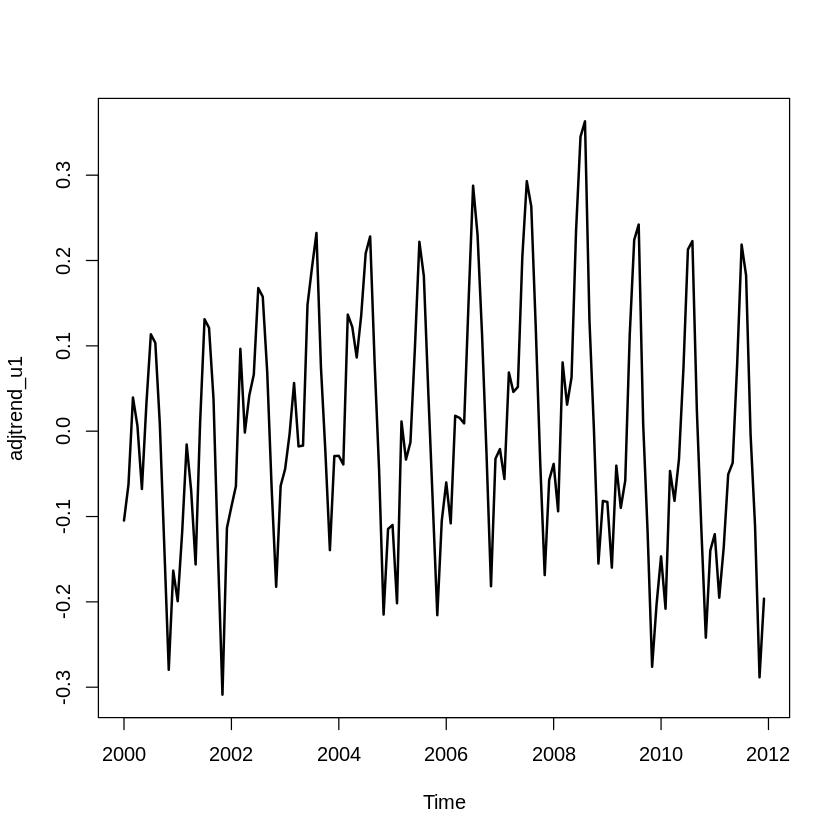

In [114]:
adjtrend_u1=log_usapass-hat_Tu1
plot.ts(adjtrend_u1,lwd=2)

In [115]:
y=factor(cycle(adjtrend_u1))

fit_u2=lm(adjtrend_u1~0+y)
summary(fit_u2)


Call:
lm(formula = adjtrend_u1 ~ 0 + y)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.158515 -0.044012  0.001096  0.045041  0.152437 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
y1  -0.08709    0.01790  -4.865 3.20e-06 ***
y2  -0.10916    0.01790  -6.098 1.11e-08 ***
y3   0.02245    0.01790   1.254  0.21195    
y4  -0.01022    0.01790  -0.571  0.56899    
y5  -0.01075    0.01790  -0.600  0.54926    
y6   0.11206    0.01790   6.260 5.00e-09 ***
y7   0.21799    0.01790  12.178  < 2e-16 ***
y8   0.21067    0.01790  11.769  < 2e-16 ***
y9   0.05919    0.01790   3.306  0.00122 ** 
y10 -0.07583    0.01790  -4.236 4.24e-05 ***
y11 -0.22103    0.01790 -12.348  < 2e-16 ***
y12 -0.10829    0.01790  -6.049 1.40e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06201 on 132 degrees of freedom
Multiple R-squared:  0.8214,	Adjusted R-squared:  0.8052 
F-statistic: 50.59 on 12 and 132 DF,  p-value: < 2.2e-16


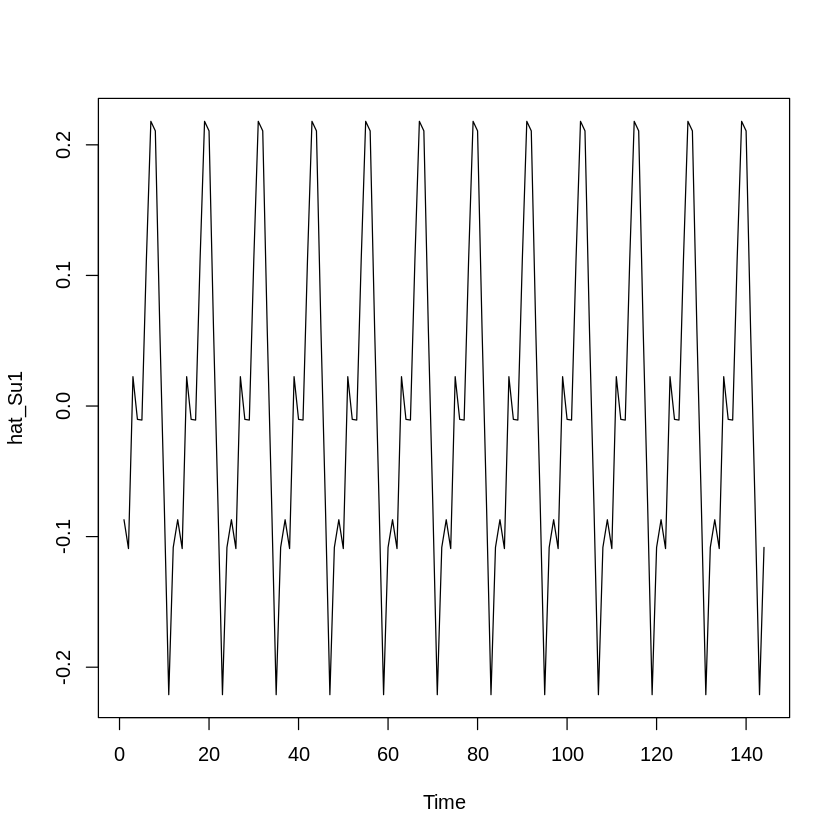

In [116]:
##계절성분 추정
hat_Su1=fitted(fit_u2)
ts.plot(hat_Su1)

###불규칙성분 추정

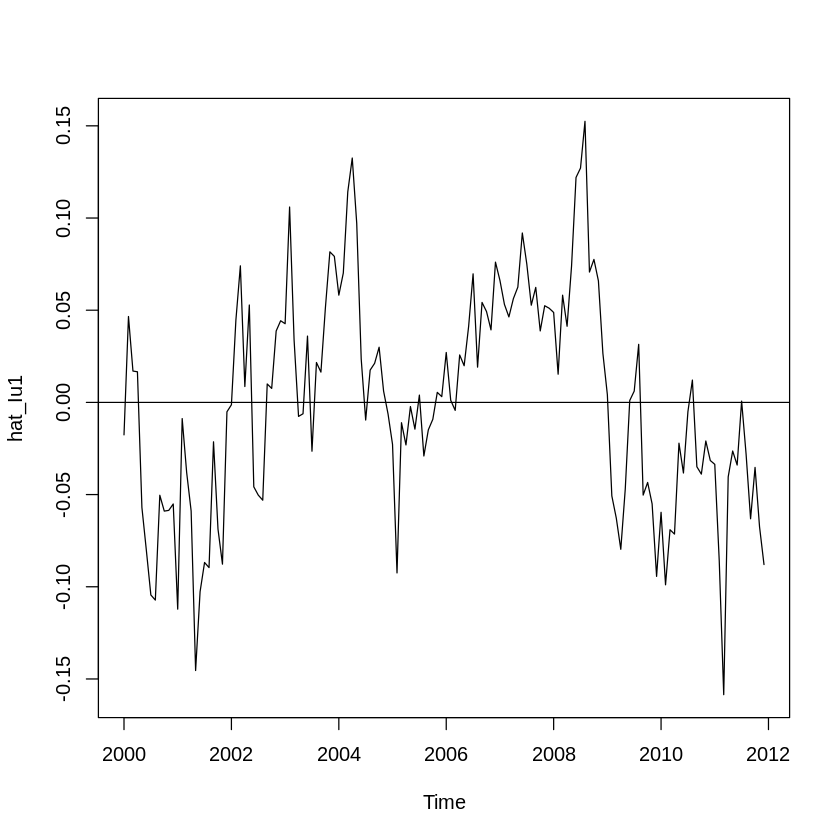

In [117]:
hat_Iu1=log_usapass-hat_Tu1-hat_Su1
ts.plot(hat_Iu1)
abline(h=0)

- 양의 상관관계가 존재하는것같음
- 0에 대해 대칭은 맞는 것 같음

In [118]:
t.test(hat_Iu1)


	One Sample t-test

data:  hat_Iu1
t = -5.5758e-16, df = 143, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.009813673  0.009813673
sample estimates:
    mean of x 
-2.768198e-18 


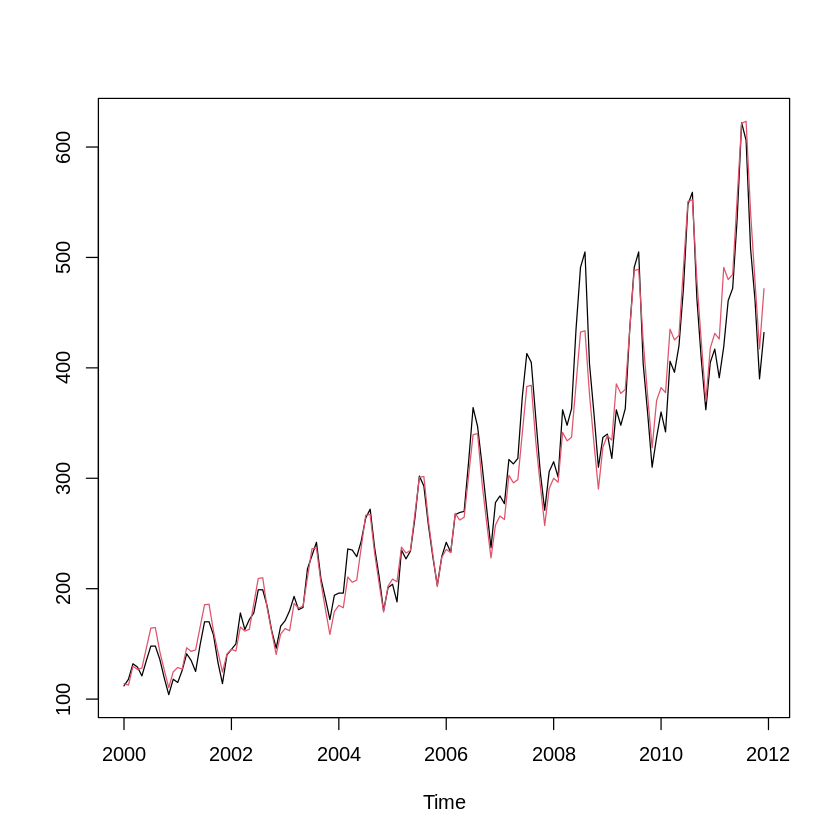

In [135]:
pred_u1=hat_Tu1+hat_Su1

ts.plot(usapass,exp(pred_u1),col=1:2)

In [136]:
sum((usapass-exp(pred_u1))^2) ##추세에 의한 분해법 SSE
mean((usapass-exp(pred_u1))^2)  ##추세에 의한 분해법 MSE

[1] 48855.68

[1] 339.2756

##평활에 의한 분해법


In [119]:
dec_fit_u1=decompose(log_usapass,"additive")

In [120]:
dec_fit_u2=decompose(usapass,type="multiplicative")

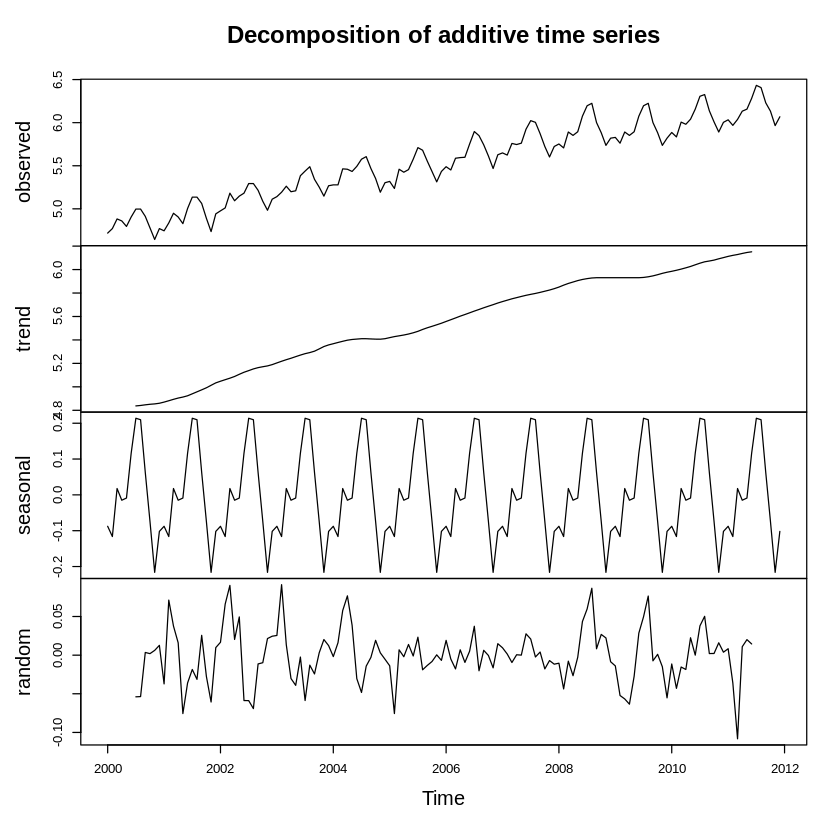

In [122]:
plot(dec_fit_u1)

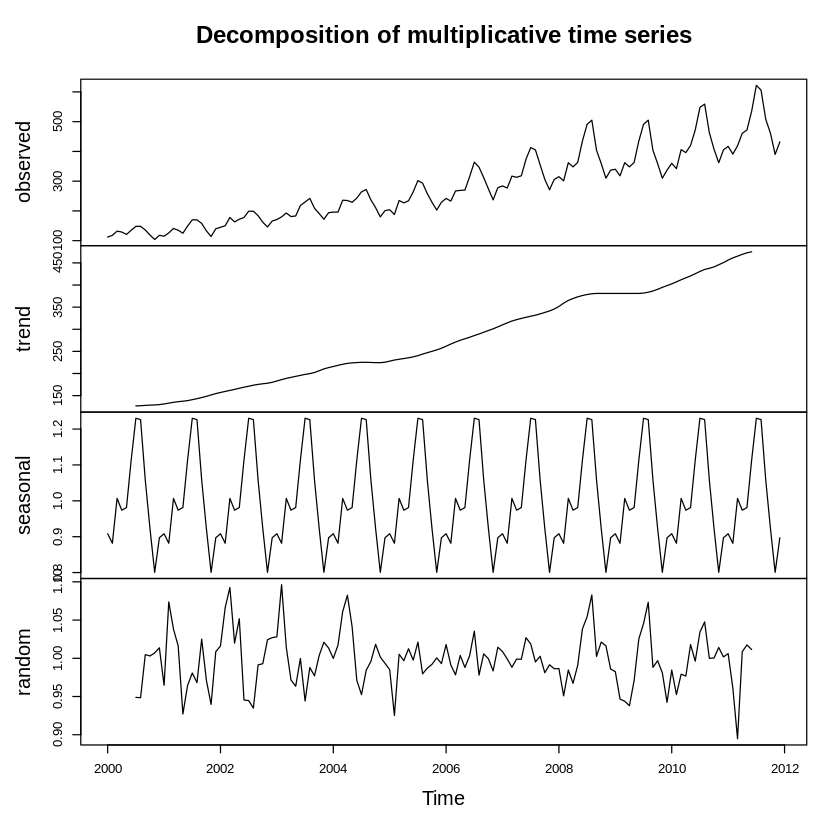

In [123]:
plot(dec_fit_u2)

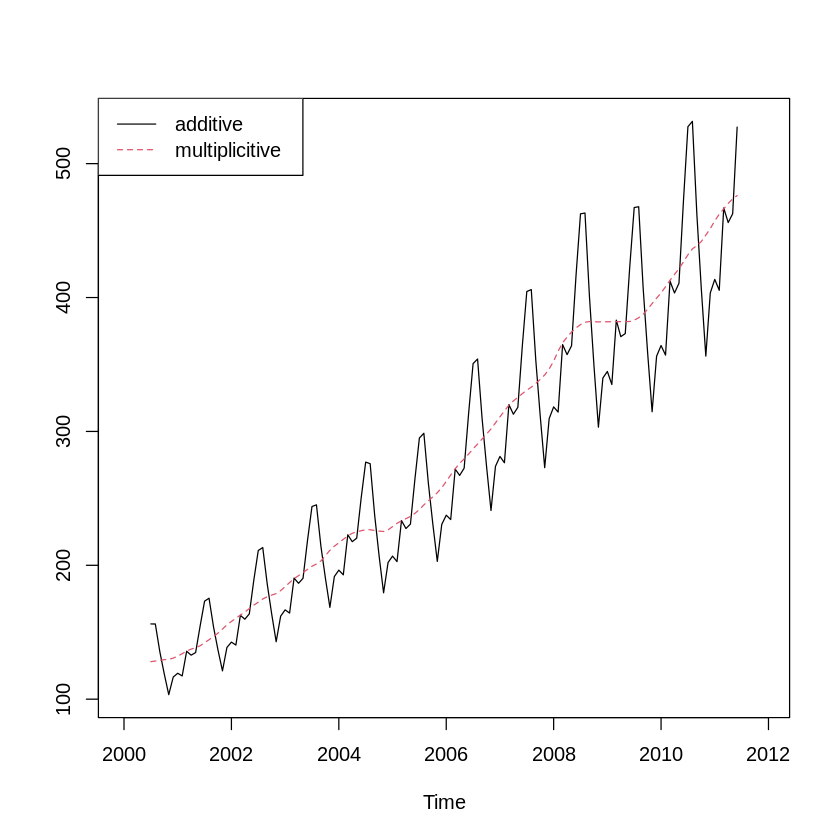

In [132]:
pred_dec_u1=dec_fit_u1$trend+dec_fit_u1$seasonal
pred_dec_u2=dec_fit_u2$trend+dec_fit_u2$seasonal


ts.plot(exp(pred_dec_u1),pred_dec_u2,col=1:2,lty=1:2)
legend("topleft",lty=1:2,col=1:2,c("additive","multiplicitive"))

In [137]:
sum((usapass-exp(pred_dec_u1))^2,na.rm=T) ##가법
mean((usapass-exp(pred_dec_u1))^2,na.rm=T) ##가법
sum((usapass-pred_dec_u2)^2,na.rm=T) ##승법
mean((usapass-pred_dec_u2)^2,na.rm=T) ##승법

[1] 15284.02

[1] 115.7881

[1] 233652.1

[1] 1770.092

##평활법
- 이분산성이 존재하므로 승법모형을 사용하는 게 적합해보임

In [138]:
length(export)

[1] 86

- ->나머지10개를 추정?

In [139]:
fit_usa_m=HoltWinters(usapass,seasonal="multiplicative")
fit_usa_m

Holt-Winters exponential smoothing with trend and multiplicative seasonal component.

Call:
HoltWinters(x = usapass, seasonal = "multiplicative")

Smoothing parameters:
 alpha: 0.3204565
 beta : 0.02388265
 gamma: 1

Coefficients:
           [,1]
a   464.9721064
b     2.7859138
s1    0.9464640
s2    0.8810274
s3    0.9648716
s4    1.0334898
s5    1.0470250
s6    1.1793118
s7    1.3631491
s8    1.3399425
s9    1.1195987
s10   0.9993794
s11   0.8438225
s12   0.9290880

In [140]:
predict(fit_usa_m,n.ahead = 12,prediction.interval = T,level=0.95)  ##예측구간

,fit,upr,lwr
Jan 2012,442.7161,466.7906,418.6417
Feb 2012,414.5621,439.7344,389.3898
Mar 2012,456.7025,483.5785,429.8265
Apr 2012,492.0608,520.7413,463.3802
May 2012,501.4220,531.4971,471.3469
Jun 2012,568.0599,601.0706,535.0491
Jul 2012,660.4096,697.4920,623.3272
Aug 2012,652.8996,690.8804,614.9188
Sep 2012,548.6541,584.0359,513.2724
Oct 2012,492.5254,526.9921,458.0587


In [141]:
fit_usa=hw(usapass,alpha=fit_usa_m$alpha,beta = fit_usa_m$beta,gamma=fit_usa_m$gamma,
            seasonal="multiplicative",initial="simple",h=12)
fit_usa$model

Holt-Winters' multiplicative method 

Call:
 hw(y = usapass, h = 12, seasonal = "multiplicative", initial = "simple",  

 Call:
     alpha = fit_usa_m$alpha, beta = fit_usa_m$beta, gamma = fit_usa_m$gamma) 

  Smoothing parameters:
    alpha = 0.3205 
    beta  = 0.0239 
    gamma = 1 

  Initial states:
    l = 126.6667 
    b = 1.0833 
    s = 0.9316 0.8211 0.9395 1.0737 1.1684 1.1684
           1.0658 0.9553 1.0184 1.0421 0.9316 0.8842

  sigma:  0.0465

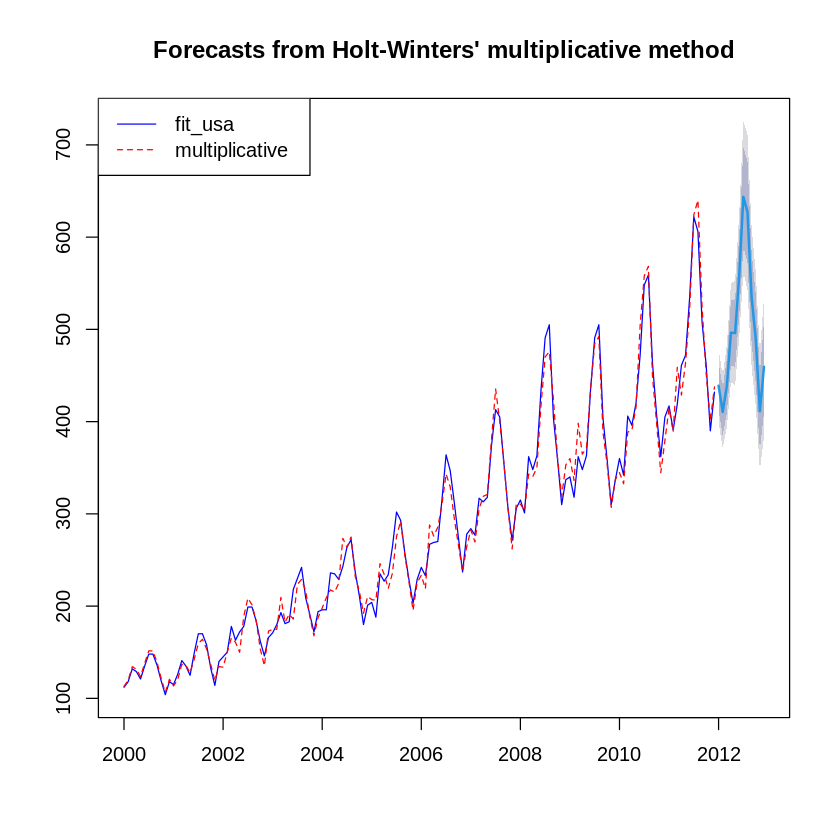

In [147]:
plot(fit_usa,col="blue",lty=1)
lines(fit_usa$fitted,col="red",lty=2)
legend("topleft",lty=1:2,col=c("blue","red"),c("fit_usa","multiplicative"))

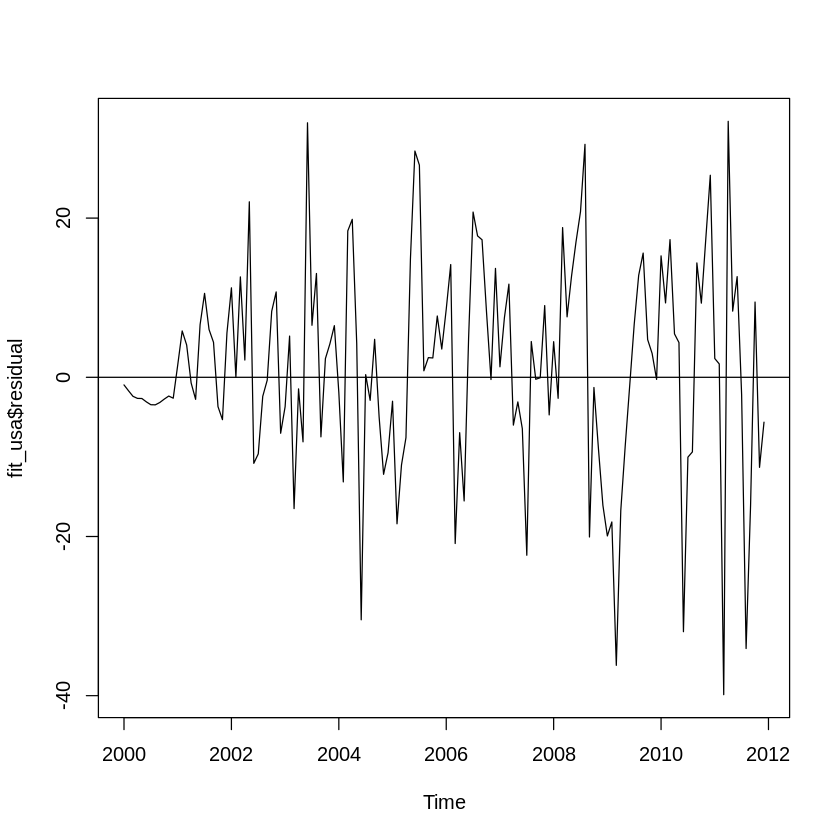

In [143]:
ts.plot(fit_usa$residual)
abline(h=0)

In [144]:
t.test(fit_usa$residual)


	One Sample t-test

data:  fit_usa$residual
t = 1.0873, df = 143, p-value = 0.2787
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.9675137  3.3332414
sample estimates:
mean of x 
 1.182864 


In [145]:
dwtest(lm(fit_usa$residual~1),alternative="two.sided")


	Durbin-Watson test

data:  lm(fit_usa$residual ~ 1)
DW = 1.4311, p-value = 0.0005873
alternative hypothesis: true autocorrelation is not 0
